In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
a.mean()

23.75

In [4]:
b.mean()

27.916666666666668

In [6]:
d = b.mean() - a.mean()
d

4.166666666666668

In [8]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [10]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [12]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [13]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [14]:
np.random.shuffle(sales_t)

In [15]:
sales_t

array([[ 0., 17.],
       [ 1., 31.],
       [ 0., 21.],
       [ 1., 28.],
       [ 0., 24.],
       [ 1., 23.],
       [ 0., 19.],
       [ 1., 27.],
       [ 0., 18.],
       [ 0., 33.],
       [ 1., 32.],
       [ 0., 23.],
       [ 0., 35.],
       [ 1., 16.],
       [ 1., 19.],
       [ 1., 32.],
       [ 0., 23.],
       [ 1., 33.],
       [ 0., 24.],
       [ 1., 41.],
       [ 0., 21.],
       [ 1., 24.],
       [ 1., 29.],
       [ 0., 27.]])

In [16]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [18]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
print(experiment_data)

[[ 0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.
   0.  1.  1.  1.  0.  0.]
 [17. 31. 21. 28. 24. 23. 19. 27. 18. 33. 32. 23. 35. 16. 19. 32. 23. 33.
  24. 41. 21. 24. 29. 27.]]


In [19]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0., 17.],
       [ 1., 31.],
       [ 0., 21.],
       [ 0., 28.],
       [ 0., 24.],
       [ 1., 23.],
       [ 1., 19.],
       [ 0., 27.],
       [ 0., 18.],
       [ 0., 33.],
       [ 1., 32.],
       [ 1., 23.],
       [ 0., 35.],
       [ 1., 16.],
       [ 0., 19.],
       [ 1., 32.],
       [ 1., 23.],
       [ 0., 33.],
       [ 0., 24.],
       [ 1., 41.],
       [ 1., 21.],
       [ 1., 24.],
       [ 0., 29.],
       [ 0., 27.]])

In [25]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([31., 23., 19., 32., 23., 16., 32., 23., 41., 21., 24.])

In [26]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

25.76923076923077

In [27]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

25.90909090909091

In [30]:
np.empty([10,1])

array([[4.65099676e-310],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000]])

In [56]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [57]:
e1 = sh_exp(1000)

In [58]:
print(e1)

[[-0.8125    ]
 [-0.57142857]
 [ 2.22222222]
 [ 5.24444444]
 [-0.26666667]
 [-2.9375    ]
 [-3.8125    ]
 [-2.93333333]
 [-2.15384615]
 [-0.64335664]
 [ 0.4       ]
 [ 2.65734266]
 [-2.33333333]
 [-1.66666667]
 [ 4.33566434]
 [ 6.0625    ]
 [ 3.11111111]
 [-0.625     ]
 [-4.17777778]
 [ 1.48251748]
 [-1.65034965]
 [ 1.42857143]
 [ 2.04195804]
 [ 0.28571429]
 [-2.34285714]
 [-3.37142857]
 [ 1.87412587]
 [ 1.25      ]
 [-0.86713287]
 [ 0.74285714]
 [-0.02797203]
 [-0.97902098]
 [-1.98601399]
 [ 0.02797203]
 [ 0.8125    ]
 [ 1.70629371]
 [-2.22222222]
 [-2.20979021]
 [-1.70629371]
 [-2.17142857]
 [ 0.66666667]
 [-0.5       ]
 [ 7.86013986]
 [-0.97777778]
 [ 3.82857143]
 [ 1.14685315]
 [-0.57142857]
 [ 3.66666667]
 [-2.97142857]
 [ 1.44537815]
 [ 0.1958042 ]
 [ 2.18487395]
 [-7.29411765]
 [ 3.2       ]
 [ 3.64444444]
 [ 0.125     ]
 [ 0.6875    ]
 [ 1.        ]
 [ 0.97142857]
 [ 2.5625    ]
 [-1.66666667]
 [-3.33333333]
 [-4.        ]
 [ 1.37062937]
 [ 2.57777778]
 [ 0.46315789]
 [-0.13986

In [60]:
len(e1[e1 >= d])

57

In [61]:
57 / 1000

0.057

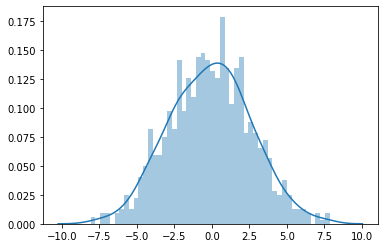

In [65]:
sns.distplot(e1, bins=50)